# Dataset Overview
This dataset contains 45,000 records of loan applicants, with various attributes related to personal demographics, financial status, and loan details. 

Dataset Content
The dataset includes 14 columns representing different factors influencing loan approvals and defaults:

Personal Information

person_age: Age of the applicant (in years).
person_gender: Gender of the applicant (male, female).
person_education: Educational background (High School, Bachelor, Master, etc.).
person_income: Annual income of the applicant (in USD).
person_emp_exp: Years of employment experience.
person_home_ownership: Type of home ownership (RENT, OWN, MORTGAGE).
Loan Details

loan_amnt: Loan amount requested (in USD).
loan_intent: Purpose of the loan (PERSONAL, EDUCATION, MEDICAL, etc.).
loan_int_rate: Interest rate on the loan (percentage).
loan_percent_income: Ratio of loan amount to income.
Credit & Loan History

cb_person_cred_hist_length: Length of the applicant's credit history (in years).
credit_score: Credit score of the applicant.
previous_loan_defaults_on_file: Whether the applicant has previous loan defaults (Yes or No).
Target Variable

loan_status: 1 if the loan was repaid successfully, 0 if the applicant defaulted.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings as w
w.filterwarnings("ignore")

In [2]:
loan = pd.read_csv("loan_data.csv")
loan

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
loan.describe(include="all")

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,45000,45000,4.500000e+04,45000.000000,45000,45000.000000,45000,45000.000000,45000.000000,45000.000000,45000.000000,45000,45000.000000
unique,NaN,2,5,NaN,NaN,4,NaN,6,NaN,NaN,NaN,NaN,2,NaN
top,NaN,male,Bachelor,NaN,NaN,RENT,NaN,EDUCATION,NaN,NaN,NaN,NaN,Yes,NaN
freq,NaN,24841,13399,NaN,NaN,23443,NaN,9153,NaN,NaN,NaN,NaN,22858,NaN
mean,27.764178,NaN,NaN,8.031905e+04,5.410333,NaN,9583.157556,NaN,11.006606,0.139725,5.867489,632.608756,NaN,0.222222
std,6.045108,NaN,NaN,8.042250e+04,6.063532,NaN,6314.886691,NaN,2.978808,0.087212,3.879702,50.435865,NaN,0.415744
min,20.000000,NaN,NaN,8.000000e+03,0.000000,NaN,500.000000,NaN,5.420000,0.000000,2.000000,390.000000,NaN,0.000000
25%,24.000000,NaN,NaN,4.720400e+04,1.000000,NaN,5000.000000,NaN,8.590000,0.070000,3.000000,601.000000,NaN,0.000000
50%,26.000000,NaN,NaN,6.704800e+04,4.000000,NaN,8000.000000,NaN,11.010000,0.120000,4.000000,640.000000,NaN,0.000000
75%,30.000000,NaN,NaN,9.578925e+04,8.000000,NaN,12237.250000,NaN,12.990000,0.190000,8.000000,670.000000,NaN,0.000000


In [5]:
loan.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [6]:
loan.duplicated().sum()

np.int64(0)

In [7]:
loan.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [8]:
loan['person_age'].describe()

count    45000.000000
mean        27.764178
std          6.045108
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

loan_status
0    35000
1    10000
Name: count, dtype: int64


<Axes: xlabel='loan_status', ylabel='count'>

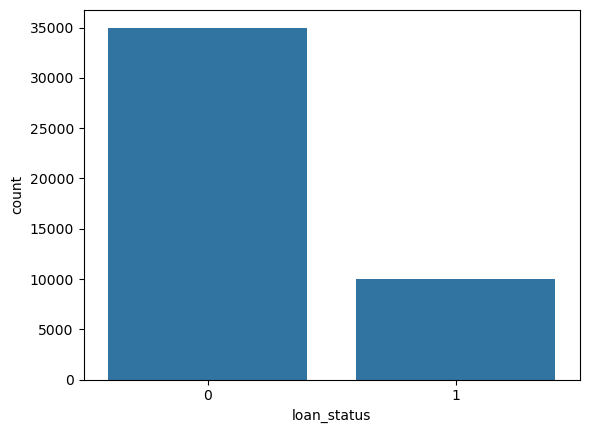

In [11]:
print(loan['loan_status'].value_counts())
sns.countplot(data=loan, x='loan_status')

<Axes: xlabel='person_gender', ylabel='count'>

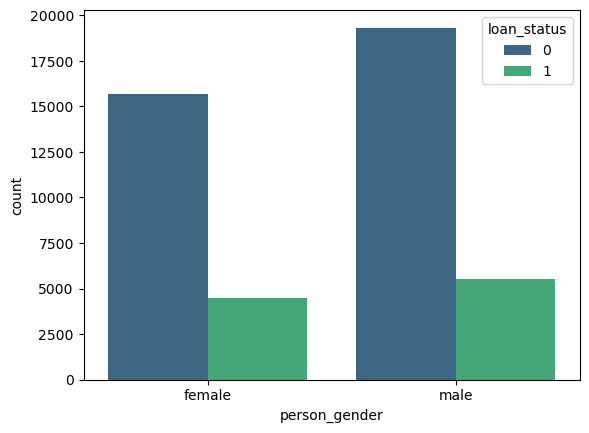

In [40]:
sns.countplot(data=loan, x='person_gender', hue='loan_status', palette="viridis")

<Axes: xlabel='loan_amnt', ylabel='Count'>

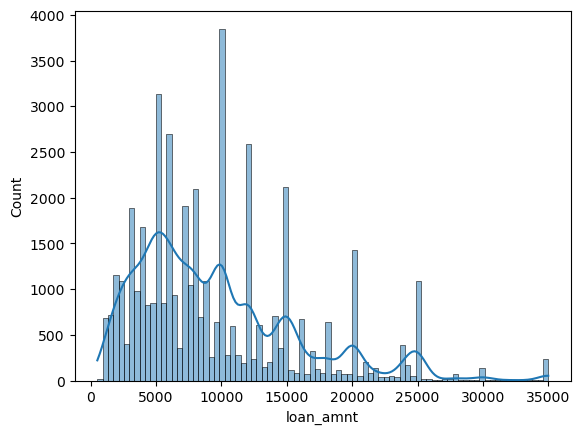

In [61]:
sns.histplot(data=loan, x='loan_amnt', kde=True)

<Axes: xlabel='person_education', ylabel='count'>

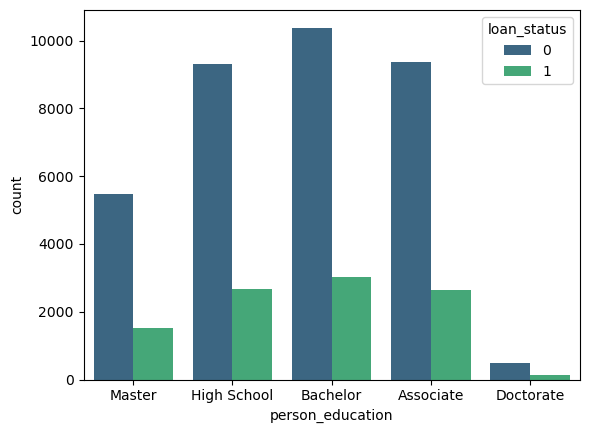

In [39]:
sns.countplot(data=loan, x='person_education', hue='loan_status', palette="viridis")

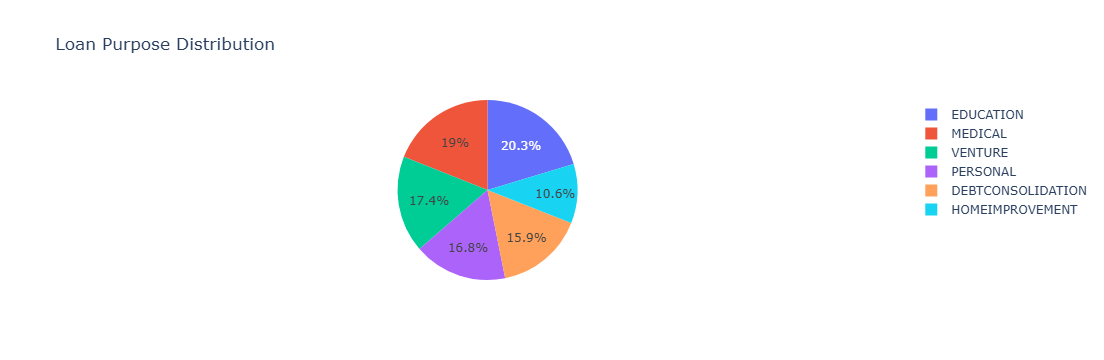

In [24]:
loan_purpose = loan["loan_intent"].value_counts().reset_index()
loan_purpose.columns = ["loan_intent", "count"]

fig = px.pie(loan_purpose,names="loan_intent",values="count",title="Loan Purpose Distribution")
fig.show()


#### Most of the loans are taken for educational purposes, follwed by medical and venture loan.

<Axes: xlabel='person_home_ownership', ylabel='count'>

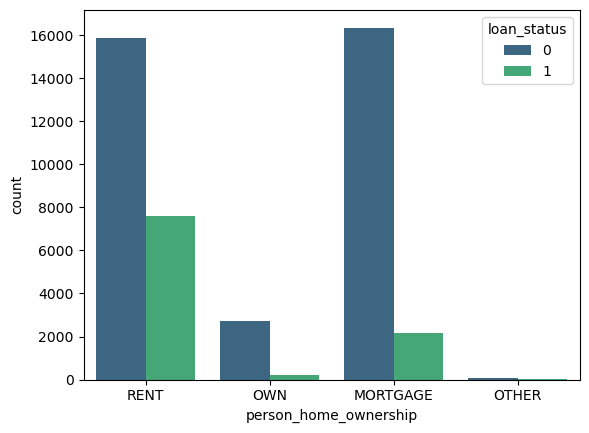

In [38]:
sns.countplot(data=loan, x='person_home_ownership', hue='loan_status', palette="viridis")

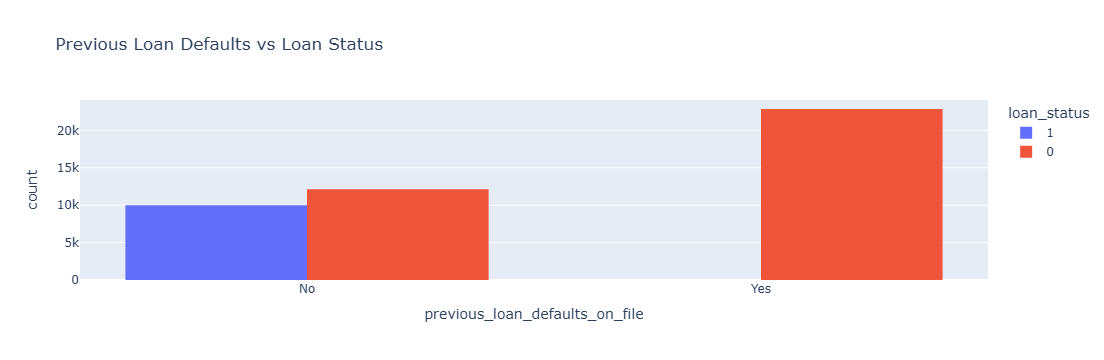

In [26]:

fig = px.histogram(loan,x="previous_loan_defaults_on_file",color="loan_status",barmode="group",title="Previous Loan Defaults vs Loan Status")
fig.show()


#### The graph shows that applicants with a history of loan default are less likely to receive approval for a new loan. This reflects common banking practices, as previous defaults reduce borrower credibility and increase the risk of future default.

In [30]:
categorical_cols = loan.select_dtypes(include="object").columns
numerical_cols = loan.select_dtypes(exclude="object").columns

categorical_cols, numerical_cols

(Index(['person_gender', 'person_education', 'person_home_ownership',
        'loan_intent', 'previous_loan_defaults_on_file'],
       dtype='object'),
 Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
        'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
        'credit_score', 'loan_status'],
       dtype='object'))

In [31]:
from sklearn.preprocessing import LabelEncoder

loan_encoded = loan.copy()

le = LabelEncoder()
for col in categorical_cols:
    loan_encoded[col] = le.fit_transform(loan_encoded[col])

<Axes: >

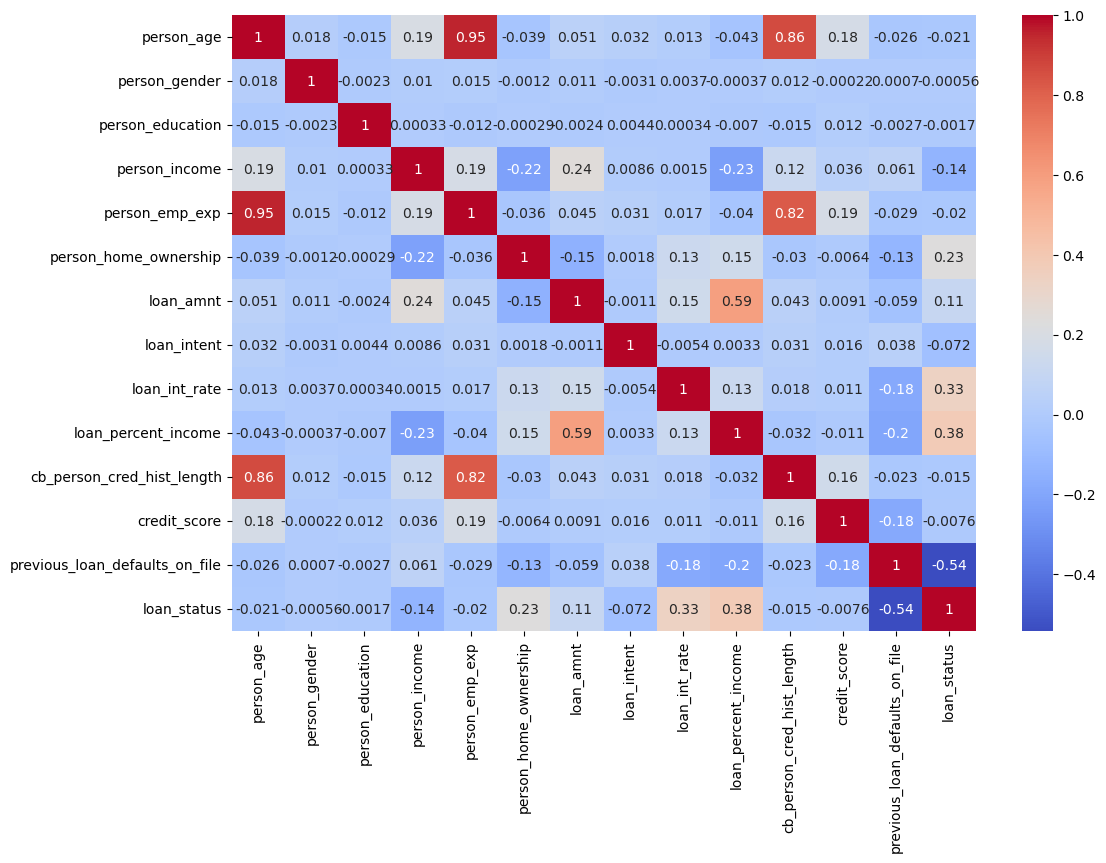

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(loan_encoded.corr(), annot=True, cmap="coolwarm")

#### We can see that "person_emp_exp" and "person_age" is highly colerated and it make sense as a person with higher age will have more experience, we can drop person_emp_exp to handle multicolinearity.

In [35]:
from sklearn.model_selection import train_test_split

x = loan_encoded.drop("loan_status", axis= 1)
y = loan_encoded["loan_status"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=14, stratify=y )

print(x.shape)
print(y.shape)

(45000, 13)
(45000,)


In [54]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

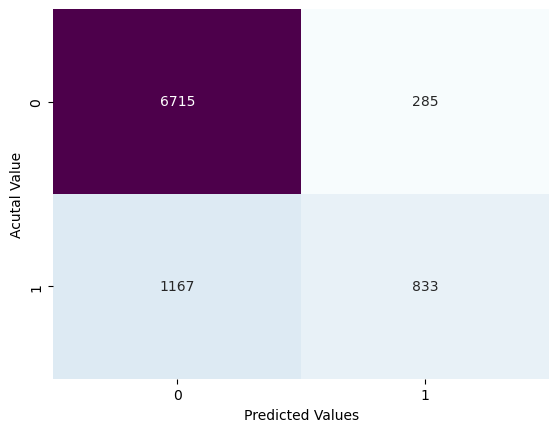

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7000
           1       0.75      0.42      0.53      2000

    accuracy                           0.84      9000
   macro avg       0.80      0.69      0.72      9000
weighted avg       0.83      0.84      0.82      9000

Accuracy Of the model: 0.8386666666666667


In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cfm,annot=True,fmt='g',cbar=False,cmap="BuPu")
plt.xlabel('Predicted Values')
plt.ylabel('Acutal Value')
plt.show() 

           
print("Classification report:")
print(classification_report(y_test,y_pred_lr))

acc=accuracy_score(y_test,y_pred_lr)
print("Accuracy Of the model:",acc)

In [56]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion="gini",max_depth=6, random_state=14)

DT.fit(x_train, y_train)

y_pred_DT = lr.predict(x_test)

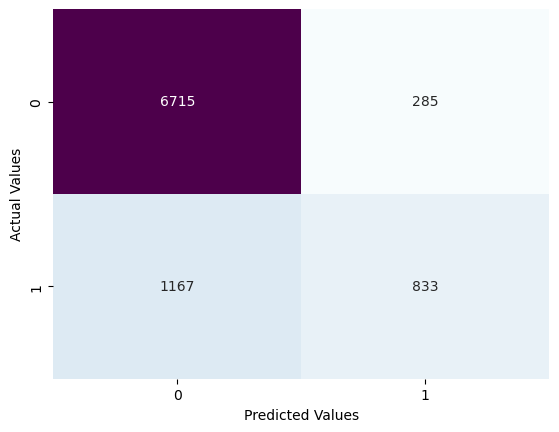

classification_report
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7000
           1       0.75      0.42      0.53      2000

    accuracy                           0.84      9000
   macro avg       0.80      0.69      0.72      9000
weighted avg       0.83      0.84      0.82      9000

Accuracy of DecisionTree Model: 0.8386666666666667


In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cmf = confusion_matrix(y_test, y_pred_DT)
sns.heatmap(cmf, annot=True, fmt="g", cbar=False, cmap="BuPu")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("classification_report")

print(classification_report(y_test, y_pred_DT))
acc1 = accuracy_score(y_test, y_pred_DT)
print("Accuracy of DecisionTree Model:", acc1)

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=10, n_estimators=200, random_state=14, class_weight="balanced")
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

[[6274  726]
 [ 196 1804]]


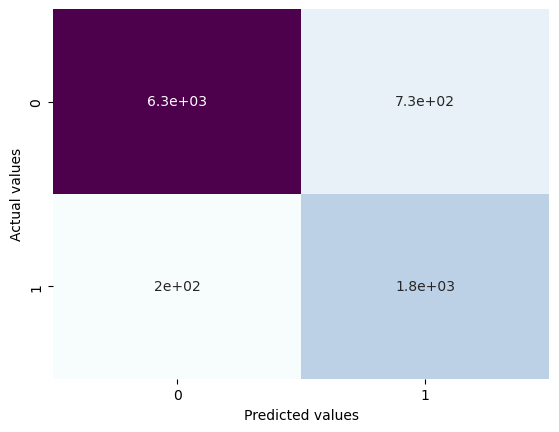

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      7000
           1       0.71      0.90      0.80      2000

    accuracy                           0.90      9000
   macro avg       0.84      0.90      0.86      9000
weighted avg       0.91      0.90      0.90      9000

Accuracy of Random Forest Model: 0.8975555555555556


In [63]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cmf = confusion_matrix(y_test, y_pred_rf)
print(cmf)
sns.heatmap(cmf, cbar=False, annot=True, cmap="BuPu")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()


print("Classification Report:")

print(classification_report(y_test, y_pred_rf))
acc2 = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest Model:", acc2)

In [65]:
import pandas as pd

rf_importance = pd.Series(
    rf.feature_importances_,
    index=x.columns
).sort_values(ascending=False)

rf_importance.head(10)

previous_loan_defaults_on_file    0.485282
loan_int_rate                     0.145857
loan_percent_income               0.139089
person_income                     0.088341
person_home_ownership             0.060667
loan_amnt                         0.028431
loan_intent                       0.019081
credit_score                      0.016261
person_age                        0.005122
person_emp_exp                    0.004606
dtype: float64

In [67]:
top_features = rf_importance[rf_importance > 0.01].index
X_rf_selected = x[top_features]

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_rf_selected,y, test_size=0.2,random_state=14,stratify=y)


In [69]:
from sklearn.ensemble import RandomForestClassifier

rf_selected = RandomForestClassifier(n_estimators=200,random_state=14,class_weight="balanced")

rf_selected.fit(X_train, y_train)

rf_pred = rf_selected.predict(X_test)

[[6823  435]
 [ 177 1565]]


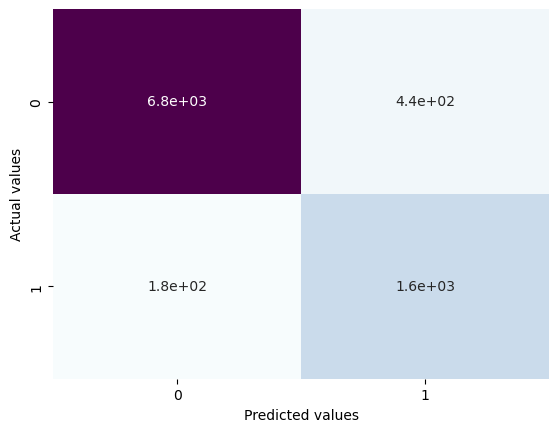

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      7258
           1       0.78      0.90      0.84      1742

    accuracy                           0.93      9000
   macro avg       0.88      0.92      0.90      9000
weighted avg       0.94      0.93      0.93      9000

Accuracy of Model: 0.932


In [70]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

confuse = confusion_matrix(rf_pred, y_test)
print(confuse)
sns.heatmap(confuse, cbar=False, annot=True, cmap="BuPu")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()


print("Classification Report:")

print(classification_report(rf_pred, y_test))
acc3 = accuracy_score(rf_pred, y_test)
print("Accuracy of Model:", acc3)


#### Random Forest feature importance was used to rank predictors. The top 10 features were selected and the model was retrained using only these variables. This reduced model complexity while maintaining or improving predictive performance.